# Análisis de datos en Jupyter Notebook

### El Siguiente es el análisis de la información de denuncias y delitos de Carabineros de Chile en la ciudad de Antofagasta, entre los años 2015 y 2017, paso a paso de muestra como por medio de la extracción de datos de la tabla original es posible visualizar e inferir relaciones y conclusiones acerca de el estado de la seguridad ciudadana en Antofgasta

## Importar base excel y muestra de tabla

In [1]:
import pandas as pd

data = pd.read_excel("DenCarab.xlsx")
data.head()

,CLASIFICACION,DEST_JURISDICCIONAL,DEST_PROCEDIMIENTO,FECHA_DELITO,ANIO,DIA,TRAMO,HORA_DELITO,DELITO,COMUNA,CUADRANTE,UBICACION,LUGAR,PAIS,ZIP
0,DENUNCIA,3RA. COM. ANTOFAGASTA,3RA. COM. ANTOFAGASTA,2015-01-01,2015.0,jueves,00:00 A 03:59,00:30:00,DA¥OS SIMPLES,ANTOFAGASTA,Cuadrante 01A,MANUEL RODRIGUEZ 2899,DOMICILIO PARTICULAR,CHILE,1240000
1,DENUNCIA,SCOM. ANTOF.NORTE 2A.ANTO,SCOM. ANTOF.NORTE 2A.ANTO,2015-01-01,2015.0,jueves,00:00 A 03:59,00:30:00,PRESUNTA DESGRACIA,ANTOFAGASTA,Cuadrante 12,NUEVA VIDA 1327,DOMICILIO PARTICULAR,CHILE,1240000
2,DENUNCIA,3RA. COM. ANTOFAGASTA,3RA. COM. ANTOFAGASTA,2015-01-01,2015.0,jueves,00:00 A 03:59,00:30:00,DA¥OS SIMPLES,ANTOFAGASTA,Cuadrante 01A,MANUEL RODRIGUEZ 2899,DOMICILIO PARTICULAR,CHILE,1240000
3,DENUNCIA,SCOM. ANTOF.NORTE 2A.ANTO,SCOM. ANTOF.NORTE 2A.ANTO,2015-01-01,2015.0,jueves,00:00 A 03:59,00:30:00,PRESUNTA DESGRACIA,ANTOFAGASTA,Cuadrante 12,NUEVA VIDA 1327,DOMICILIO PARTICULAR,CHILE,1240000
4,DENUNCIA,3RA. COM. ANTOFAGASTA,3RA. COM. ANTOFAGASTA,2015-01-01,2015.0,jueves,00:00 A 03:59,01:00:00,USO FRAUDULENTO DE TARJETAS DE CREDITO Y DEBIT...,ANTOFAGASTA,Cuadrante 01A,RENDIC 5535,DOMICILIO PARTICULAR,CHILE,1240000


## Filas y columnas de la tabla

In [2]:
data.shape

(291250, 15)

## Cantidad de denuncias y detenciones

In [3]:
data["TOTAL"] = 1
data_clas = data.groupby("CLASIFICACION")["TOTAL"].count()
display(data_clas)
display(data_clas.plot.bar())

CLASIFICACION
DENUNCIA     243189
DETENCION     48061
Name: TOTAL, dtype: int64

## Separar data en DENUNCIAS Y DETENCIONES

In [4]:
denuncias = data[data["CLASIFICACION"] == "DENUNCIA"]
detenciones = data[data["CLASIFICACION"] == "DETENCION"]

In [5]:
#Clasificar con booleans

tot_den = denuncias.groupby("DELITO")["TOTAL"].count()
tot_det = detenciones.groupby("DELITO")["TOTAL"].count()

In [6]:
#Cantidad de tipos de delitos en denuncias
display(tot_den.shape)
#Cantidad de tipos de delitos en detenciones
display(tot_det.shape)

(354,)

(191,)

# 1.- DENUNCIAS
# a.- Incidencias, Analisis Tramo, Cuadrante, Dia de la semana

## Seleccion de delitos con mayor numero de incidencias

In [7]:
df_den = pd.DataFrame(tot_den)
top_den = df_den[df_den["TOTAL"] > 2500]

top_den.sort_values(by="TOTAL", ascending=False)

,TOTAL
DELITO,
OTRAS INFRACCIONES TRANSITO,44698
ESTACIONAMIENTOS INDEBIDOS,33168
"LICENCIA, CONDUCIR SIN",22823
ESTACIONAMIENTOS PROHIBIDO SE¥ALIZADO,14308
CONSUMO DE BEBIDAS ALCOHOLICAS EN LA VIA PUBLICA,13680
DA¥OS SIMPLES,6466
REVISION TECNICA VENCIDA,5803
AMENAZAS SIMPLES CONTRA PERSONAS Y PROPIEDADES ART. 296,5257
"VELOCIDAD, EXCESO",4667


In [8]:
den_tramos = data.groupby("TRAMO")["TOTAL"].count()
den_cuadr = data.groupby("CUADRANTE")["TOTAL"].count()
den_dia = data.groupby("DIA")["TOTAL"].count()

## Ocurrencia de denuncias por segmentos horario

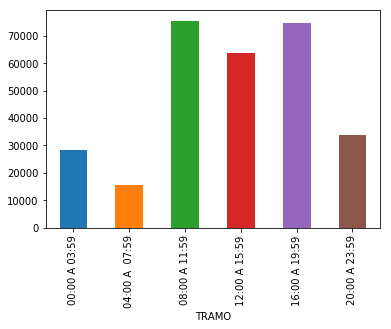

In [9]:
%matplotlib inline
den_tramos.plot.bar()

## Numero de denuncias por cuadrante

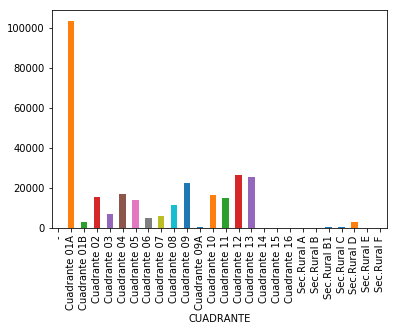

In [10]:
den_cuadr.plot.bar()

## Denuncias según día de la semana

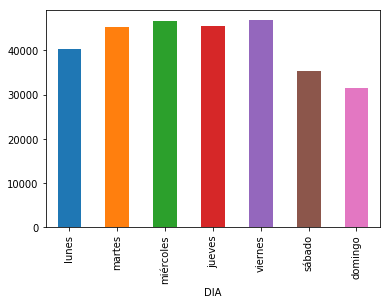

In [11]:
ord_dias = ["lunes", "martes", "miércoles", "jueves", "viernes", "sábado", "domingo"]
den_dia.reindex(ord_dias).plot.bar(sort_columns=True)

## Gráfico de actividad total de denuncias por mes

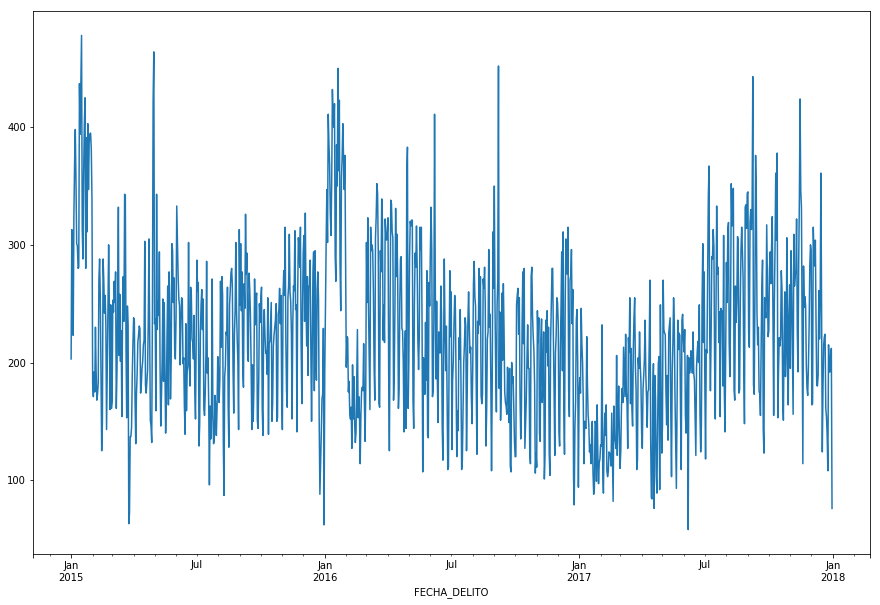

In [12]:
den_semana = denuncias.groupby("FECHA_DELITO")["TOTAL"].count()
den_semana.plot(figsize=(15,10))

## Días del año con mayor numero de denuncias

In [13]:
df_deldia = pd.DataFrame(den_semana)
dia_top = df_deldia.sort_values(by="TOTAL", ascending=False)
dia_top10 = dia_top[:10]
dia_top10

,TOTAL
FECHA_DELITO,
2015-01-16,478
2015-04-30,464
2016-09-07,452
2016-01-20,450
2017-09-08,443
2015-01-15,437
2015-01-13,437
2016-01-12,432
2015-01-21,425


## Promedio de delitos por día

In [14]:
promedio_diario = den_dia.sum()/365
promedio_diario

797.9232876712329

# b.- COMPARACION 2015, 2016, 2017

## Total de denuncias en periodo completo

In [15]:
display(denuncias.shape)
#Total de detenciones en periodo completo
display(detenciones.shape)

(243189, 16)

(48061, 16)

## Agrupar por mes y año total de denuncias

In [16]:
den_yr_mes = denuncias.groupby(["FECHA_DELITO"])["TOTAL"].count()
den_yr_sum_ma = den_yr_mes.groupby([(den_yr_mes.index.month),(den_yr_mes.index.year) ]).sum()

den_yr_sum_pl = den_yr_sum_ma.unstack()

In [17]:
den_yr_sum_pl

FECHA_DELITO,2015,2016,2017
FECHA_DELITO,,,
1,10782,10770,4578
2,5932,4943,3799
3,6684,8417,5689
4,6578,7406,4912
5,6966,7460,6007
6,6713,6637,5784
7,5933,5999,7365
8,6742,6924,8334
9,6889,6088,7609


## Agrupar por mes y año promedio de denuncias

In [18]:
den_yr_mes_prom = denuncias.groupby(["FECHA_DELITO"])["TOTAL"].mean()
den_yr_prom_ma = den_yr_mes_prom.groupby([(den_yr_mes_prom.index.month),(den_yr_mes_prom.index.year) ]).sum()

den_yr_prom_pl = den_yr_prom_ma.unstack()
prom_denuncias = den_yr_sum_pl/den_yr_prom_pl
prom_denuncias

FECHA_DELITO,2015,2016,2017
FECHA_DELITO,,,
1,347.806452,347.419355,147.677419
2,211.857143,170.448276,135.678571
3,215.612903,271.516129,183.516129
4,219.266667,246.866667,163.733333
5,224.709677,240.645161,193.774194
6,223.766667,221.233333,192.800000
7,191.387097,193.516129,237.580645
8,217.483871,223.354839,268.838710
9,229.633333,202.933333,253.633333


## Gráfico comparativo 2015, 2016, 2017 de total de denuncias por mes

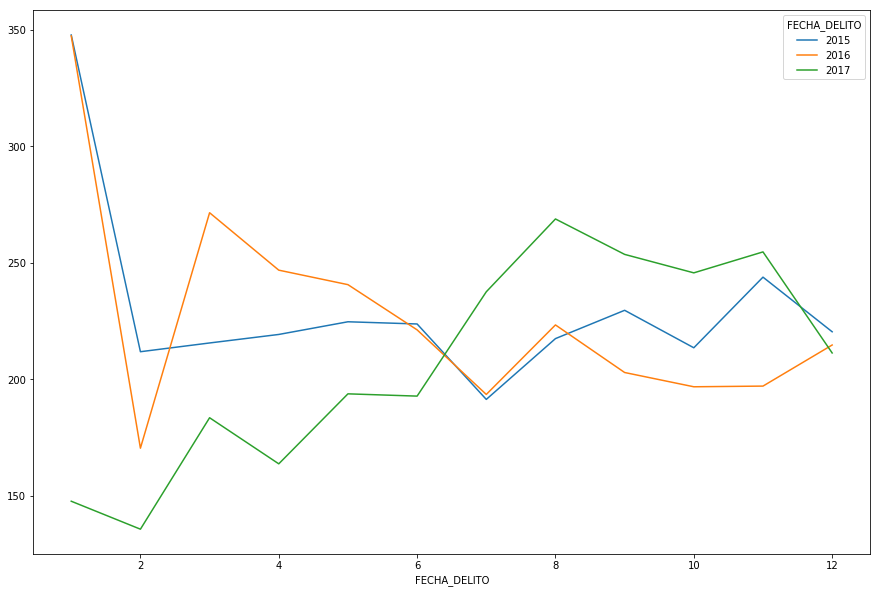

In [19]:
prom_denuncias.plot(figsize=(15,10))

## Agrupación por mes y año de total de denuncias

In [20]:
den_yr_fecha = denuncias.groupby(["FECHA_DELITO"])["TOTAL"].count()
df_den_dma = den_yr_fecha.groupby([(den_yr_fecha.index.year), (den_yr_fecha.index.month), (den_yr_fecha.index.day)]).sum()
df_den_dma_pl = df_den_dma.unstack()
df_den_dma_pl.head(15)

FECHA_DELITO                  1      2      3      4      5      6      7   \
FECHA_DELITO FECHA_DELITO                                                    
2015         1             203.0  313.0  272.0  223.0  325.0  370.0  398.0   
             2             182.0  171.0  192.0  175.0  230.0  192.0  168.0   
             3             167.0  253.0  243.0  269.0  251.0  277.0  161.0   
             4             238.0  235.0  168.0  131.0  173.0  190.0  217.0   
             5             233.0  237.0  159.0  343.0  228.0  252.0  240.0   
             6             238.0  333.0  301.0  273.0  254.0  248.0  198.0   
             7             287.0  261.0  268.0  129.0  147.0  224.0  249.0   
             8             195.0  166.0  185.0  269.0  213.0  273.0  257.0   
             9             249.0  301.0  244.0  277.0  194.0  179.0  267.0   
             10            254.0  264.0  162.0  138.0  229.0  245.0  222.0   
             11            143.0  257.0  278.0  257.0  315.0  220.0  176.0   
             12            293.0  308.0  235.0  327.0  250.0  214.0  273.0   
2016         1             191.0  246.0  301.0  347.0  302.0  411.0  386.0   
             2             196.0  222.0  221.0  175.0  184.0  156.0  152.0   
             3             302.0  251.0  323.0  244.0  201.0  160.0  315.0   

FECHA_DELITO                  8      9      10  ...       22     23     24  \
FECHA_DELITO FECHA_DELITO                       ...                          
2015         1             354.0  301.0  299.0  ...    280.0  391.0  311.0   
             2             173.0  182.0  271.0  ...    192.0  245.0  300.0   
             3             193.0  257.0  332.0  ...    153.0  248.0  231.0   
             4             223.0  231.0  229.0  ...    233.0  305.0  227.0   
             5             294.0  197.0  146.0  ...    277.0  246.0  169.0   
             6             236.0  255.0  254.0  ...    264.0  257.0  220.0   
             7             262.0  228.0  254.0  ...    156.0  271.0  154.0   
             8             133.0   87.0  188.0  ...    195.0  157.0  224.0   
             9             246.0  326.0  275.0  ...    271.0  232.0  255.0   
             10            208.0  210.0  190.0  ...    236.0  250.0  150.0   
             11            162.0  255.0  265.0  ...    141.0  257.0  306.0   
             12            189.0  264.0  266.0  ...    277.0  254.0  151.0   
2016         1             368.0  326.0  308.0  ...    423.0  283.0  244.0   
             2             162.0  127.0  198.0  ...    155.0  176.0  179.0   
             3             295.0  300.0  295.0  ...    277.0  339.0  320.0   

FECHA_DELITO                  25     26     27     28     29     30     31  
FECHA_DELITO FECHA_DELITO                                                   
2015         1             403.0  347.0  387.0  394.0  395.0  382.0  339.0  
             2             249.0  160.0  249.0  161.0    NaN    NaN    NaN  
             3              63.0   72.0  137.0  137.0  145.0  189.0  217.0  
             4             151.0  146.0  132.0  243.0  422.0  464.0    NaN  
             5             201.0  301.0  295.0  251.0  272.0  211.0  203.0  
             6             217.0  203.0  240.0  175.0  152.0  224.0    NaN  
             7             131.0  134.0  172.0  164.0  138.0  161.0  205.0  
             8             244.0  302.0  245.0  220.0  200.0  143.0  313.0  
             9             259.0  151.0  144.0  184.0  250.0  234.0    NaN  
             10            153.0  241.0  245.0  263.0  233.0  257.0  175.0  
             11            299.0  281.0  315.0  216.0  165.0  245.0    NaN  
             12             88.0  113.0  139.0  169.0  173.0  229.0   62.0  
2016         1             356.0  374.0  403.0  375.0  347.0  376.0  280.0  
             2             176.0  216.0  169.0  133.0  177.0    NaN    NaN  
             3             219.0  249.0  217.0  322.0  306.0  304.0  311.0  

[15 rows x 31 columns]

## Extraer valores por dia del mes del periodo completo
## Crear heatmap de valores diarios totales

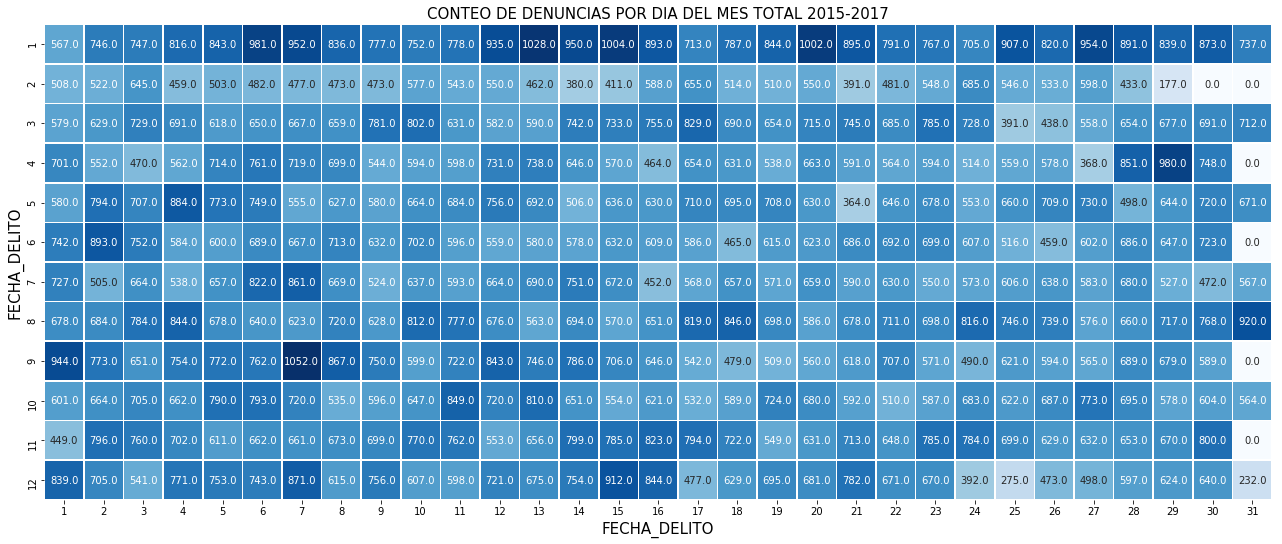

In [21]:
den_df_diames = den_yr_fecha.groupby([(den_yr_fecha.index.month), (den_yr_fecha.index.day)]).sum()
den_diames_pl = den_df_diames.unstack()
den_diames_pl[29] = pd.to_numeric(den_diames_pl[29], errors='coerce').fillna(0)
den_diames_pl[30] = pd.to_numeric(den_diames_pl[30], errors='coerce').fillna(0)
den_diames_pl[31] = pd.to_numeric(den_diames_pl[31], errors='coerce').fillna(0)
den_dm_pl_int = den_diames_pl.astype(int)


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.figure(figsize=(22,22))
plt.xlabel("Dia", size=15)
plt.ylabel("Mes", size=15)
plt.title("CONTEO DE DENUNCIAS POR DIA DEL MES TOTAL 2015-2017", size=15)
sns.heatmap(den_dm_pl_int, annot=True, fmt=".1f", linewidth=.5, square=True, 
            cbar=False, cmap="Blues")

# c.- Información según cuadrantes cuadrantes, comisarías

## Mayor cantidad de denunucias por tipo de delito

In [22]:
top_den.sort_values(by="TOTAL", ascending=False)

,TOTAL
DELITO,
OTRAS INFRACCIONES TRANSITO,44698
ESTACIONAMIENTOS INDEBIDOS,33168
"LICENCIA, CONDUCIR SIN",22823
ESTACIONAMIENTOS PROHIBIDO SE¥ALIZADO,14308
CONSUMO DE BEBIDAS ALCOHOLICAS EN LA VIA PUBLICA,13680
DA¥OS SIMPLES,6466
REVISION TECNICA VENCIDA,5803
AMENAZAS SIMPLES CONTRA PERSONAS Y PROPIEDADES ART. 296,5257
"VELOCIDAD, EXCESO",4667


## Número de denuncias por cuadrante

In [23]:
den_cuadr

CUADRANTE
-                     1
Cuadrante 01A    103630
Cuadrante 01B      3048
Cuadrante 02      15532
Cuadrante 03       6873
Cuadrante 04      16709
Cuadrante 05      13734
Cuadrante 06       5104
Cuadrante 07       5779
Cuadrante 08      11430
Cuadrante 09      22502
Cuadrante 09A       237
Cuadrante 10      16202
Cuadrante 11      14859
Cuadrante 12      26313
Cuadrante 13      25208
Cuadrante 14         58
Cuadrante 15         18
Cuadrante 16         19
Sec.Rural A          87
Sec.Rural B          24
Sec.Rural B1        538
Sec.Rural C         342
Sec.Rural D        2886
Sec.Rural E          27
Sec.Rural F          86
Name: TOTAL, dtype: int64

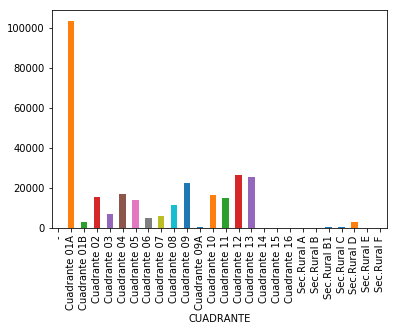

In [24]:
den_cuadr.plot.bar()

## Destino jurisdiccional

In [25]:
den_destino = denuncias.groupby("DEST_JURISDICCIONAL")["TOTAL"].count()
den_destino

DEST_JURISDICCIONAL
2DA. COM. ANTOFAGASTA         45010
3RA. COM. ANTOFAGASTA        123551
R. ALEMANIA (M.C.) 1A.TAL        12
R. SIERRA GORDA 1RA. CALA        13
R. SOCOMPA (F) 2A.SAN PED        11
SCOM. ANTOF.NORTE 2A.ANTO     50354
SUBCOM. PLAYA BLANCA 3RA.     24238
Name: TOTAL, dtype: int64

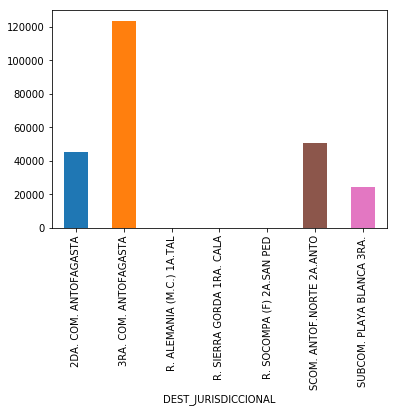

In [26]:
den_destino.plot.bar()

## Destino de procedimiento

In [27]:
den_destproc = denuncias.groupby("DEST_PROCEDIMIENTO")["TOTAL"].count()
df_destpr = pd.DataFrame(den_destproc)
den_destproc_top = df_destpr[df_destpr["TOTAL"] > 30]
den_destproc_top.sort_values(by="TOTAL", ascending=False)

,TOTAL
DEST_PROCEDIMIENTO,
3RA. COM. ANTOFAGASTA,125696
SCOM. ANTOF.NORTE 2A.ANTO,47823
2DA. COM. ANTOFAGASTA,43416
R. PLAYA BLANCA 3RA.ANTOF,17846
SUBCOM. PLAYA BLANCA 3RA.,6172
TCIA.BAQUEDANO (M.C.) 2DA,770
S.E.B.V. ANTOFAGASTA,585
OFICINA SEG. PRIV. O.S.10,331
T. MEJILLONES SCOM.ANTOF.,66


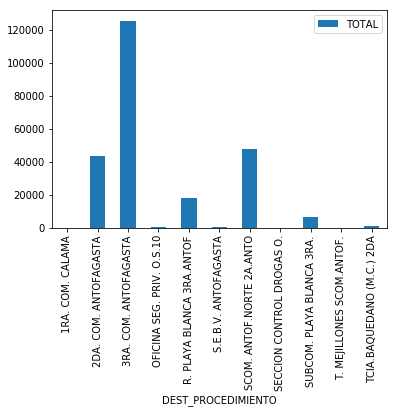

In [28]:
den_destproc_top.plot.bar()

# 2.- DETENCIONES
# a.- Incidencias, Analisis Tramo, Cuadrante, Dia de la semana

## Mayor número de incidencias

In [29]:
df_det = pd.DataFrame(tot_det)
top_det = df_det[df_det["TOTAL"] > 400]

top_det.sort_values(by="TOTAL", ascending=False)

,TOTAL
DELITO,
APREHENDIDO POR ORDEN JUDICIAL,12674
HURTO SUPERMERCADO O CENTROS COMERCIALES,9338
CONDUCCION ESTADO DE EBRIEDAD CON O SIN DA¥OS O LESIONE,2875
CONSUMO/PORTE EN LUGARES PUBLICOS O PRIV.CON PREVIO CON,2797
VIOLENCIA INTRAFAMILIAR A MUJER (LESIONES LEVES),2179
AMENAZAS SIMPLES CONTRA PERSONAS Y PROPIEDADES ART. 296,1558
LESIONES LEVES ART. 494 NRO. 5,1464
PORTE ARMA BLANCA,1265
RI¥A PUBLICA 496 NRO. 10 CODIGO PENAL,1086


In [30]:
det_tramos = data.groupby("TRAMO")["TOTAL"].count()
det_cuadr = data.groupby("CUADRANTE")["TOTAL"].count()
det_dia = data.groupby("DIA")["TOTAL"].count()

## Ocurrencia de detenciones por segmentos horario

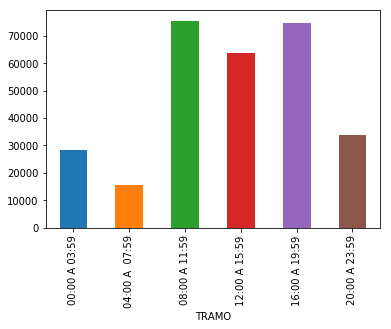

In [31]:
%matplotlib inline
det_tramos.plot.bar()

## Numero de detenciones por cuadrante

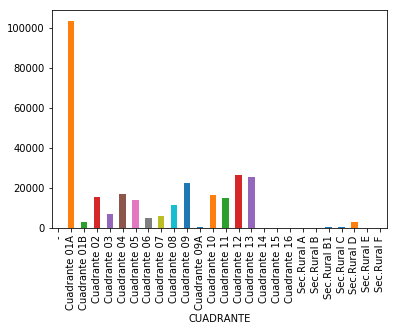

In [32]:
det_cuadr.plot.bar()

## Detenciones por día de la semana

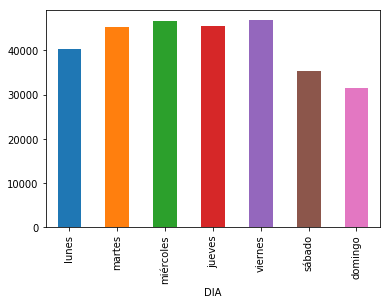

In [33]:
det_dia.reindex(ord_dias).plot.bar(sort_columns=True)

## Gráfico de cantidd de detenciiones por mes

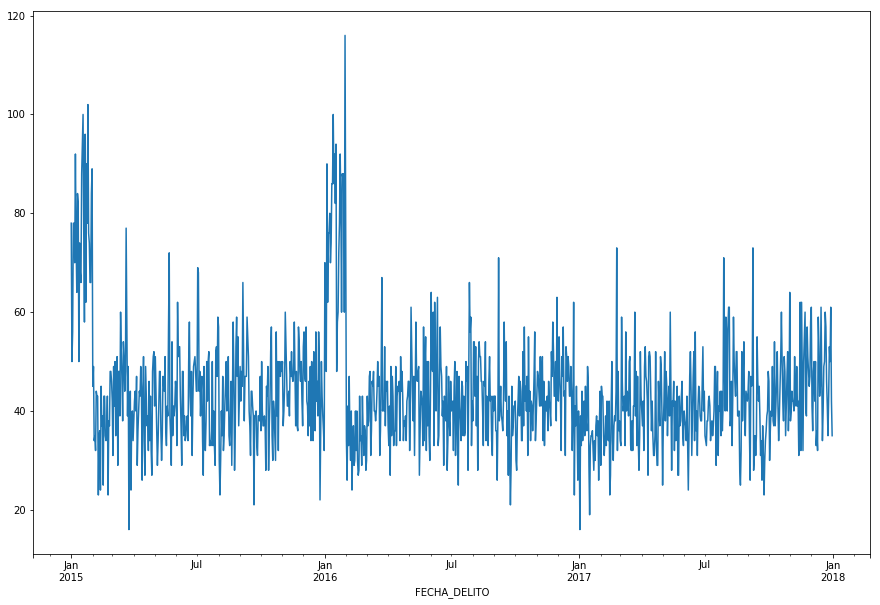

In [34]:
det_semana = detenciones.groupby("FECHA_DELITO")["TOTAL"].count()
det_semana.plot(figsize=(15,10))

## Días del año con mayor numero de detenciones

In [35]:
df_deldia_det = pd.DataFrame(det_semana)
det_dia_top = df_deldia_det.sort_values(by="TOTAL", ascending=False)
det_dia_top10 = det_dia_top[:10]
det_dia_top10

,TOTAL
FECHA_DELITO,
2016-01-30,116
2015-01-25,102
2016-01-13,100
2015-01-18,100
2015-01-21,96
2016-01-17,94
2015-01-17,94
2015-01-07,92
2016-01-23,92


## Promedio de delitos por día

In [36]:
promedio_diario_det = det_dia.sum()/365
promedio_diario_det

797.9232876712329

# b.- COMPARACION 2015, 2016, 2017

## Agrupar por mes y año total de detenciones

In [37]:
det_yr_mes = detenciones.groupby(["FECHA_DELITO"])["TOTAL"].count()
det_yr_sum_ma = det_yr_mes.groupby([(det_yr_mes.index.month),(det_yr_mes.index.year) ]).sum()
det_yr_sum_pl = det_yr_sum_ma.unstack()

In [38]:
det_yr_sum_pl

FECHA_DELITO,2015,2016,2017
FECHA_DELITO,,,
1,2363,2394,1100
2,1063,987,1075
3,1354,1323,1288
4,1211,1210,1231
5,1296,1336,1231
6,1308,1341,1221
7,1342,1304,1272
8,1287,1347,1372
9,1288,1199,1160


## Agrupar por mes y año número de detenciones

In [39]:
det_yr_mes_prom = detenciones.groupby(["FECHA_DELITO"])["TOTAL"].mean()
det_yr_prom_ma = det_yr_mes_prom.groupby([(det_yr_mes_prom.index.month),(det_yr_mes_prom.index.year) ]).sum()

det_yr_prom_pl = det_yr_prom_ma.unstack()
prom_detenciones = det_yr_sum_pl/det_yr_prom_pl
prom_detenciones

FECHA_DELITO,2015,2016,2017
FECHA_DELITO,,,
1,76.225806,77.225806,35.483871
2,37.964286,34.034483,38.392857
3,43.677419,42.677419,41.548387
4,40.366667,40.333333,41.033333
5,41.806452,43.096774,39.709677
6,43.600000,44.700000,40.700000
7,43.290323,42.064516,41.032258
8,41.516129,43.451613,44.258065
9,42.933333,39.966667,38.666667


## Gráfico comparativo 2015, 2016, 2017 de total de detenciones por mes

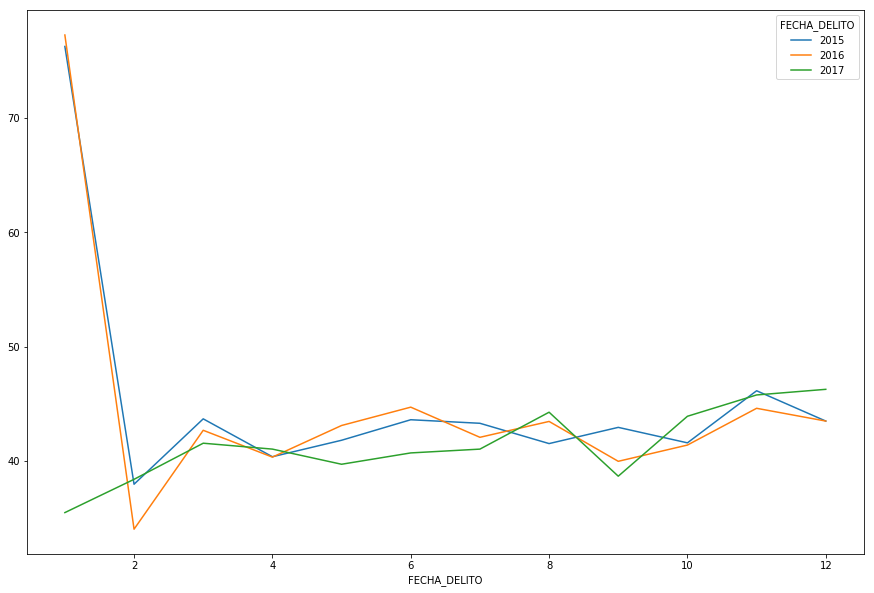

In [40]:
prom_detenciones.plot(figsize=(15,10))

## Agrupación por mes y año de total de detenciones

In [41]:
det_yr_fecha = detenciones.groupby(["FECHA_DELITO"])["TOTAL"].count()
df_det_dma = det_yr_fecha.groupby([(det_yr_fecha.index.year), (det_yr_fecha.index.month), (det_yr_fecha.index.day)]).sum()
df_det_dma_pl = df_det_dma.unstack()
df_det_dma_pl.head(15)

FECHA_DELITO                 1     2     3     4     5     6     7     8   \
FECHA_DELITO FECHA_DELITO                                                   
2015         1             78.0  50.0  56.0  78.0  78.0  70.0  92.0  74.0   
             2             45.0  49.0  34.0  35.0  32.0  44.0  43.0  43.0   
             3             42.0  31.0  49.0  41.0  50.0  35.0  45.0  51.0   
             4             38.0  42.0  44.0  40.0  47.0  29.0  36.0  40.0   
             5             41.0  51.0  43.0  36.0  29.0  34.0  41.0  48.0   
             6             44.0  33.0  62.0  51.0  53.0  53.0  43.0  37.0   
             7             44.0  69.0  68.0  44.0  48.0  39.0  44.0  47.0   
             8             57.0  30.0  23.0  30.0  40.0  35.0  47.0  32.0   
             9             49.0  42.0  48.0  45.0  66.0  52.0  38.0  47.0   
             10            36.0  50.0  40.0  37.0  37.0  39.0  37.0  28.0   
             11            50.0  37.0  40.0  45.0  60.0  53.0  47.0  41.0   
             12            53.0  56.0  47.0  46.0  57.0  42.0  41.0  35.0   
2016         1             70.0  60.0  48.0  90.0  62.0  76.0  76.0  80.0   
             2             34.0  26.0  41.0  33.0  47.0  35.0  30.0  40.0   
             3             30.0  43.0  37.0  38.0  47.0  48.0  31.0  36.0   

FECHA_DELITO                 9     10  ...     22    23    24     25    26  \
FECHA_DELITO FECHA_DELITO              ...                                   
2015         1             64.0  84.0  ...   62.0  90.0  78.0  102.0  76.0   
             2             23.0  35.0  ...   43.0  23.0  38.0   37.0  48.0   
             3             29.0  48.0  ...   57.0  39.0  49.0   16.0  34.0   
             4             44.0  43.0  ...   32.0  46.0  34.0   43.0  32.0   
             5             48.0  36.0  ...   72.0  39.0  35.0   29.0  54.0   
             6             29.0  48.0  ...   39.0  48.0  31.0   42.0  49.0   
             7             34.0  27.0  ...   36.0  50.0  33.0   40.0  33.0   
             8             35.0  41.0  ...   58.0  48.0  28.0   36.0  53.0   
             9             47.0  47.0  ...   39.0  39.0  40.0   33.0  31.0   
             10            45.0  43.0  ...   30.0  56.0  39.0   50.0  32.0   
             11            41.0  44.0  ...   37.0  36.0  57.0   54.0  48.0   
             12            46.0  37.0  ...   39.0  56.0  50.0   22.0  35.0   
2016         1             70.0  74.0  ...   78.0  92.0  82.0   60.0  88.0   
             2             24.0  32.0  ...   35.0  29.0  43.0   36.0  31.0   
             3             46.0  45.0  ...   48.0  67.0  40.0   42.0  40.0   

FECHA_DELITO                 27    28    29     30    31  
FECHA_DELITO FECHA_DELITO                                 
2015         1             74.0  66.0  66.0   84.0  89.0  
             2             48.0  46.0   NaN    NaN   NaN  
             3             44.0  24.0  39.0   40.0  34.0  
             4             27.0  48.0  51.0   52.0   NaN  
             5             35.0  41.0  39.0   41.0  46.0  
             6             50.0  51.0  48.0   44.0   NaN  
             7             29.0  52.0  53.0   47.0  59.0  
             8             59.0  47.0  55.0   37.0  43.0  
             9             39.0  39.0  38.0   47.0   NaN  
             10            50.0  48.0  47.0   50.0  48.0  
             11            46.0  50.0  42.0   37.0   NaN  
             12            50.0  43.0  39.0   36.0  32.0  
2016         1             87.0  88.0  60.0  116.0  73.0  
             2             37.0  36.0  28.0    NaN   NaN  
             3             53.0  37.0  46.0   44.0  46.0  

[15 rows x 31 columns]

## Extraer valores por dia del mes del periodo completo
## Crear heatmap de valores diarios totales

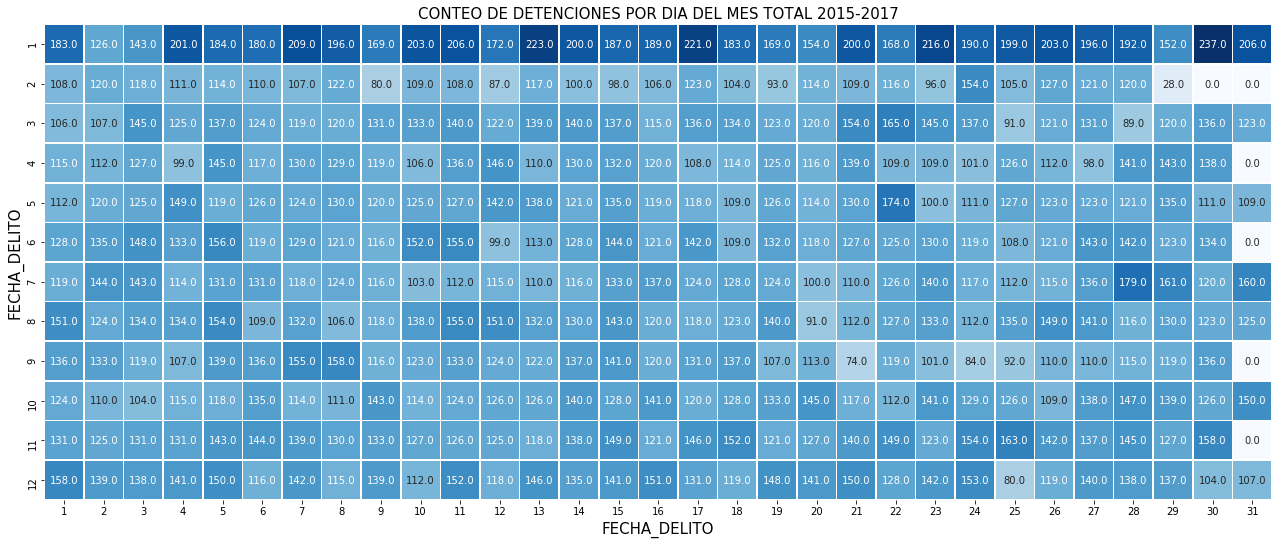

In [42]:
det_df_diames = det_yr_fecha.groupby([(det_yr_fecha.index.month), (det_yr_fecha.index.day)]).sum()
det_diames_pl = det_df_diames.unstack()
det_diames_pl[29] = pd.to_numeric(det_diames_pl[29], errors='coerce').fillna(0)
det_diames_pl[30] = pd.to_numeric(det_diames_pl[30], errors='coerce').fillna(0)
det_diames_pl[31] = pd.to_numeric(det_diames_pl[31], errors='coerce').fillna(0)
det_dm_pl_int = det_diames_pl.astype(int)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.figure(figsize=(22,22))
plt.xlabel("Dia", size=15)
plt.ylabel("Mes", size=15)
plt.title("CONTEO DE DETENCIONES POR DIA DEL MES TOTAL 2015-2017", size=15)
sns.heatmap(det_dm_pl_int, annot=True, fmt=".1f", linewidth=.5, square=True, 
            cbar=False, cmap="Blues")


# c.- Información según cuadrantes cuadrantes, comisarías

## Mayor cantidad de detenciones por tipo de delito

In [43]:
top_det.sort_values(by="TOTAL", ascending=False)

,TOTAL
DELITO,
APREHENDIDO POR ORDEN JUDICIAL,12674
HURTO SUPERMERCADO O CENTROS COMERCIALES,9338
CONDUCCION ESTADO DE EBRIEDAD CON O SIN DA¥OS O LESIONE,2875
CONSUMO/PORTE EN LUGARES PUBLICOS O PRIV.CON PREVIO CON,2797
VIOLENCIA INTRAFAMILIAR A MUJER (LESIONES LEVES),2179
AMENAZAS SIMPLES CONTRA PERSONAS Y PROPIEDADES ART. 296,1558
LESIONES LEVES ART. 494 NRO. 5,1464
PORTE ARMA BLANCA,1265
RI¥A PUBLICA 496 NRO. 10 CODIGO PENAL,1086


## Cantidad detenciones por cuadrante

In [44]:
det_cuadr

CUADRANTE
-                     1
Cuadrante 01A    103630
Cuadrante 01B      3048
Cuadrante 02      15532
Cuadrante 03       6873
Cuadrante 04      16709
Cuadrante 05      13734
Cuadrante 06       5104
Cuadrante 07       5779
Cuadrante 08      11430
Cuadrante 09      22502
Cuadrante 09A       237
Cuadrante 10      16202
Cuadrante 11      14859
Cuadrante 12      26313
Cuadrante 13      25208
Cuadrante 14         58
Cuadrante 15         18
Cuadrante 16         19
Sec.Rural A          87
Sec.Rural B          24
Sec.Rural B1        538
Sec.Rural C         342
Sec.Rural D        2886
Sec.Rural E          27
Sec.Rural F          86
Name: TOTAL, dtype: int64

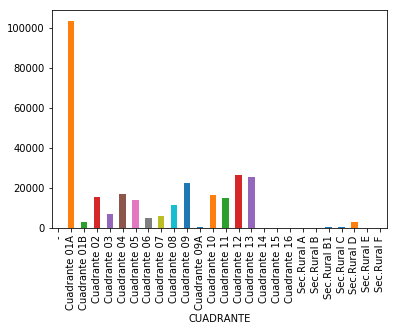

In [45]:
det_cuadr.plot.bar()

## Destino jurisdiccional

In [46]:
det_destino = detenciones.groupby("DEST_JURISDICCIONAL")["TOTAL"].count()
det_destino

DEST_JURISDICCIONAL
2DA. COM. ANTOFAGASTA         9830
3RA. COM. ANTOFAGASTA        22328
R. ALEMANIA (M.C.) 1A.TAL       15
SCOM. ANTOF.NORTE 2A.ANTO    12620
SUBCOM. PLAYA BLANCA 3RA.     3268
Name: TOTAL, dtype: int64

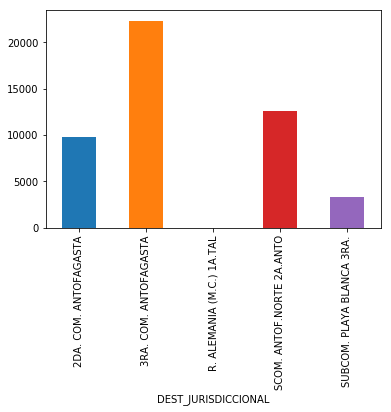

In [47]:
det_destino.plot.bar()

## Destino de procedimiento

In [48]:
det_destproc = detenciones.groupby("DEST_PROCEDIMIENTO")["TOTAL"].count()
df_destpr_det = pd.DataFrame(det_destproc)
destproc_det_top = df_destpr_det[df_destpr_det["TOTAL"] > 30]
destproc_det_top.sort_values(by="TOTAL", ascending=False)

,TOTAL
DEST_PROCEDIMIENTO,
3RA. COM. ANTOFAGASTA,21614
SCOM. ANTOF.NORTE 2A.ANTO,12717
2DA. COM. ANTOFAGASTA,8599
R. PLAYA BLANCA 3RA.ANTOF,2406
SECCION CONTROL DROGAS O.,1763
SUBCOM. PLAYA BLANCA 3RA.,573
S.E.B.V. ANTOFAGASTA,371


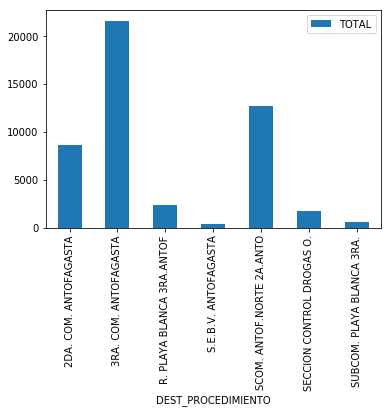

In [49]:
destproc_det_top.plot.bar()